## **Reading data and storing in pandas dataframe**

In [6]:
#Viewing data
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
data.head()
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [7]:
#Finding unique values in all columns
for columns in data.columns:
  y = data[columns].unique()
  print(columns, y)

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education_qual ['tertiary' 'secondary' 'unknown' 'primary']
call_type ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
mon ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
dur [ 261  151   76 ... 1298 1246 1556]
num_calls [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
prev_outcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']




# Cleaning and encoding data

In [8]:
#Encoding target value as 1 and 0
data.y = data['y'].map({"no":0, "yes": 1})

Age column cleaning and encoding

In [9]:
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [10]:
data.age = data.age.clip(18,70)

In [11]:
data.age.describe()

count    45211.000000
mean        40.862799
std         10.379659
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

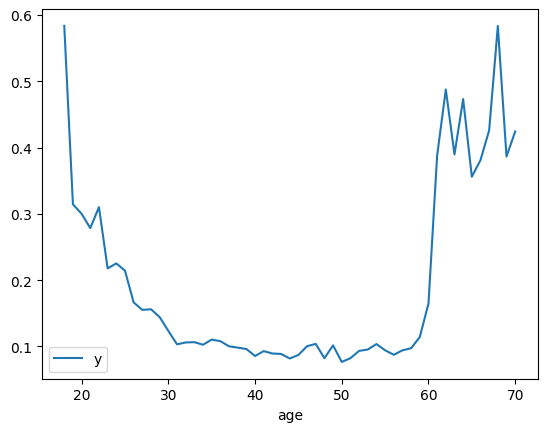

In [12]:
age_conversion_rate = data.groupby('age')['y'].mean()
age_sorted = age_conversion_rate.reset_index().sort_values('age')
age_sorted.plot(x = "age", y = "y", kind = "line")

In [13]:
data.age.describe()

count    45211.000000
mean        40.862799
std         10.379659
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [14]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

The number of unknowns is less, so we impute unknowns with the mode 'blue-collar'

In [15]:
data.job.replace("unknown","blue-collar", inplace = True)


<Axes: xlabel='job'>

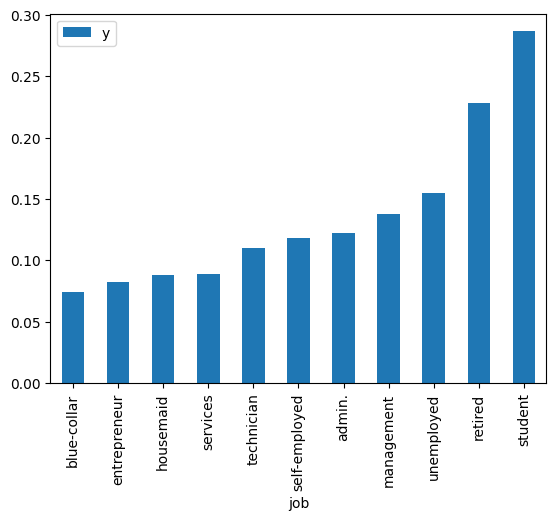

In [16]:
job_conversion_rate = data.groupby('job')['y'].mean()
job_sorted = job_conversion_rate.reset_index().sort_values('y')
job_sorted.plot(x = "job", y = "y", kind = "bar")


Sorting and encoding the job classes according to the conversion rates

In [17]:
data.job = data['job'].map({"blue-collar":1,"entrepreneur":2, "housemaid":3, "services":4,"technician":5, "self-employed":6,
                            "admin.": 7, "management": 8, "unemployed":9, "retired":10, "student":11})

marital status column cleaning and encoding

In [18]:
data.marital.value_counts()


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

<Axes: xlabel='marital'>

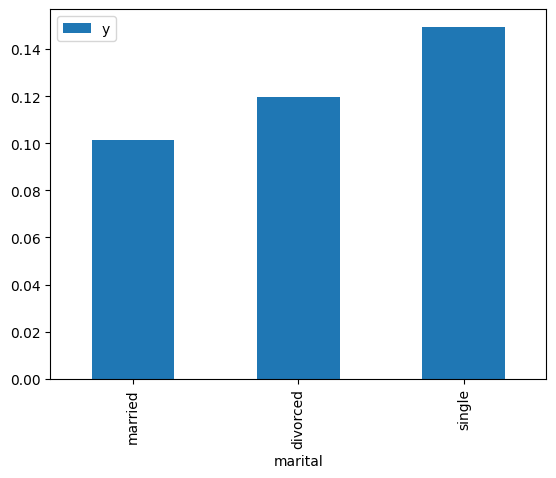

In [19]:
marital_conversion_rate = data.groupby('marital')['y'].mean()
marital_sorted = marital_conversion_rate.reset_index().sort_values('y')
marital_sorted.plot(x = "marital", y = "y", kind = "bar")


In [20]:
# data.marital = data['marital'].map({'married': 1, 'divorced': 2, 'single':3})

One hot encoding of marital status column

In [21]:
data = pd.concat([data, pd.get_dummies(data.marital , 'marital')] , axis = 1)
data.drop('marital', axis = 1, inplace = True)

Educational qualification column cleaning and encoding

In [22]:
data.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [23]:
data.education_qual.replace("unknown","secondary", inplace = True)

<Axes: xlabel='education_qual'>

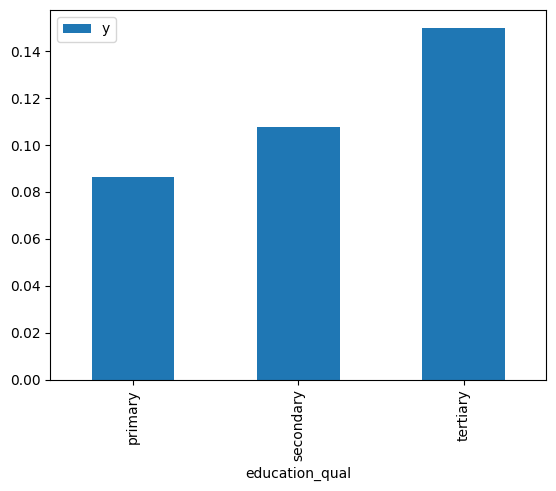

In [24]:
edu_conversion_rate = data.groupby('education_qual')['y'].mean()
edu_sorted = edu_conversion_rate.reset_index().sort_values('y')
edu_sorted.plot(x = "education_qual", y = "y", kind = "bar")

Sorting and encoding the classes according to the conversion rates

In [25]:
data.education_qual = data['education_qual'].map({'primary':1,"secondary":2,"tertiary":3})


Call type column cleaning and encoding

In [26]:
data.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

Here,the unknowns form a large percentage of the data. So we treat unknowns as a seperate class

<Axes: xlabel='call_type'>

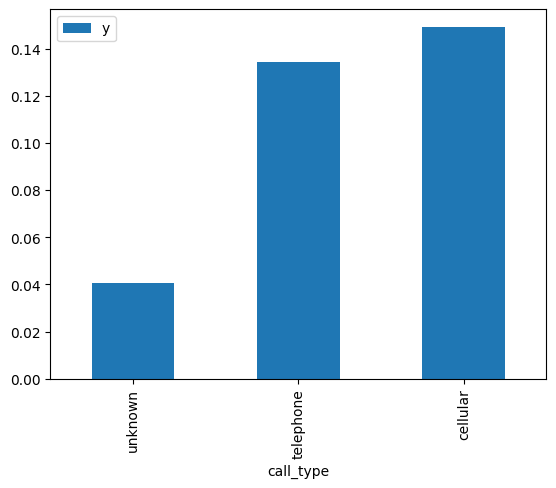

In [27]:
call_type_conversion_rate = data.groupby('call_type')['y'].mean()
call_type_sorted = call_type_conversion_rate.reset_index().sort_values('y')
call_type_sorted.plot(x = "call_type", y = "y", kind = "bar")

In [28]:
# data.call_type = data.call_type.map({"unknown":1,"telephone":2,"cellular":3})


One hot encoding of call type column

In [29]:
data = pd.concat([data, pd.get_dummies(data.call_type , 'call_type')] , axis = 1)
data.drop('call_type', axis = 1, inplace = True)

Cleaning and encoding of day column

<Axes: xlabel='day'>

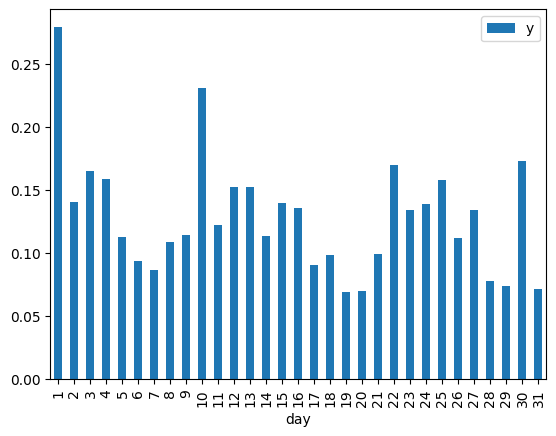

In [30]:
day_conversion_rate = data.groupby('day')['y'].mean()
day_sorted = day_conversion_rate.reset_index().sort_values('day')
day_sorted.plot(x = "day", y = "y", kind = "bar")

Cleaning and encoding of month column

<Axes: xlabel='mon'>

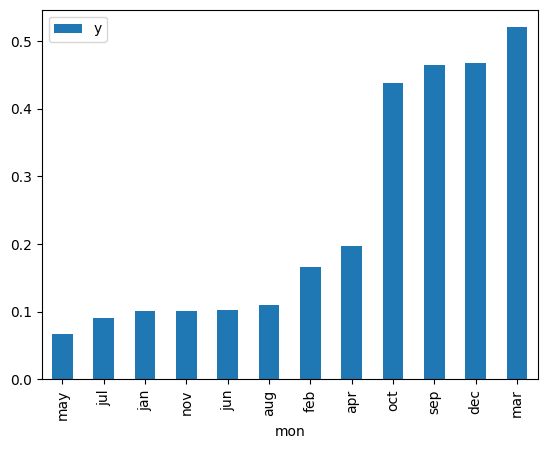

In [31]:
mon_conversion_rate = data.groupby('mon')['y'].mean()
mon_sorted = mon_conversion_rate.reset_index().sort_values('y')
mon_sorted.plot(x = "mon", y = "y", kind = "bar")

Sorting months according to the conversion rates and encoding them

In [32]:
data.mon = data.mon.map({"may":1,"jul":2,"jan":3,"nov":4,"jun":5,"aug":6,"feb":7,"apr":8,"oct":9,"sep":10,"dec":11,"mar":12})

Cleaning and encoding of duration column

In [33]:
data.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

Treating outeliers in duration column. IQR = (319-103) = 216

1.5 * IQR = 324

So thresholds = -221 , 643

In [34]:
data.dur.clip(0,643, inplace = True)
data.dur.describe()

count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: dur, dtype: float64

<Axes: xlabel='dur'>

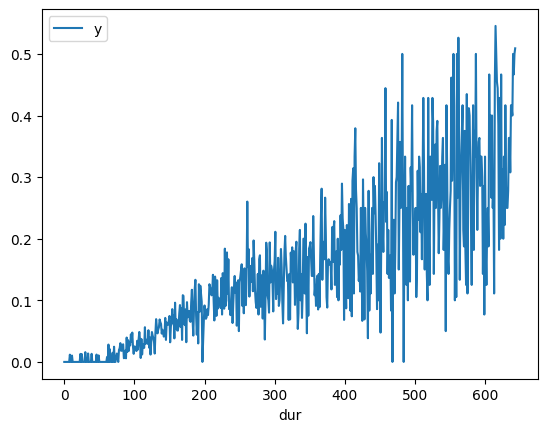

In [35]:
dur_conversion_rate = data.groupby('dur')['y'].mean()
dur_sorted = dur_conversion_rate.reset_index().sort_values('dur')
dur_sorted.plot(x = "dur", y = "y", kind = "line")

Removing noises in the duration value by taking a modulo of 30. This will ground all values to the lower 30 second interval

In [36]:
data.dur = data.dur.transform(lambda x: x//30)

<Axes: xlabel='dur'>

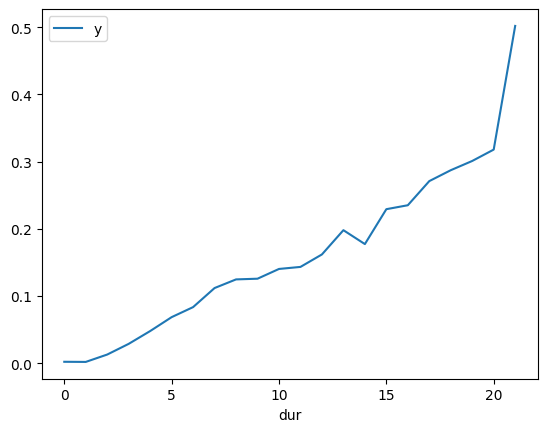

In [37]:
dur_conversion_rate = data.groupby('dur')['y'].mean()
dur_sorted = dur_conversion_rate.reset_index().sort_values('dur')
dur_sorted.plot(x = "dur", y = "y", kind = "line")


In [38]:
data.dur.describe()

count    45211.000000
mean         7.352569
std          5.907227
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         21.000000
Name: dur, dtype: float64

Cleaning and encoding number of calls column

In [39]:
data.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

Treating outeliers. IQR = 3-1 = 2

1.5 * IQR = 3. So thresholds are -2 and 6

In [40]:
data.num_calls.clip(0,6,inplace=True)


<Axes: xlabel='num_calls'>

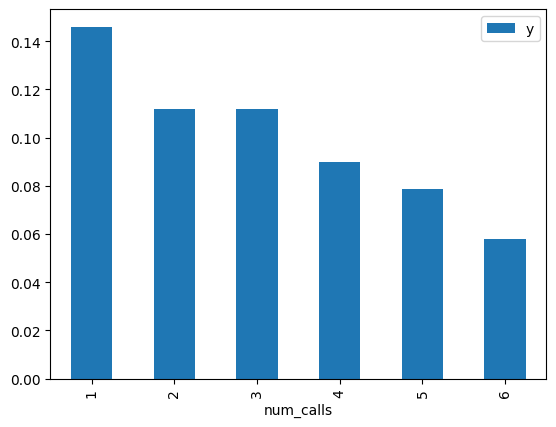

In [41]:
num_calls_conversion_rate = data.groupby('num_calls')['y'].mean()
num_calls_sorted = num_calls_conversion_rate.reset_index().sort_values('num_calls')
num_calls_sorted.plot(x = "num_calls", y = "y", kind = "bar")

Cleaning and encoding previous outcome column

In [42]:
data.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

Here, unknowns form the largest percentage of data. So we handle them as seperate class

<Axes: xlabel='prev_outcome'>

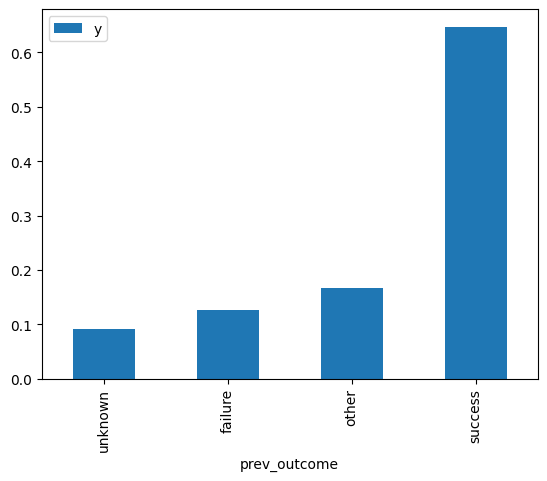

In [43]:
prev_outcome_conversion_rate = data.groupby('prev_outcome')['y'].mean()
prev_outcome_sorted = prev_outcome_conversion_rate.reset_index().sort_values('y')
prev_outcome_sorted.plot(x = "prev_outcome", y = "y", kind = "bar")

In [44]:
# data.prev_outcome = data.prev_outcome.map({'unknown':1,'failure':2,'other':3,'success':4})

One hot encoding of prev_outcome column

In [45]:
data = pd.concat([data, pd.get_dummies(data.prev_outcome , 'prev_outcome')] , axis = 1)
data.drop('prev_outcome', axis = 1, inplace = True)

# **Seperating features and target**

Here,there is an imbalance in classes of the target variable and hence there is a need to balance the data

Seperating features and targets

In [46]:
y = pd.DataFrame(data.y, columns = ['y'])

X = data.drop('y', axis = 1)


In [47]:
X

,age,job,education_qual,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,call_type_cellular,call_type_telephone,call_type_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,5,1,8,1,0,1,0,0,0,1,0,0,0,1
1,44,5,2,5,1,5,1,0,0,1,0,0,1,0,0,0,1
2,33,2,2,5,1,2,1,0,1,0,0,0,1,0,0,0,1
3,47,1,2,5,1,3,1,0,1,0,0,0,1,0,0,0,1
4,33,1,2,5,1,6,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,3,17,4,21,3,0,1,0,1,0,0,0,0,0,1
45207,70,10,1,17,4,15,2,1,0,0,1,0,0,0,0,0,1
45208,70,10,2,17,4,21,5,0,1,0,1,0,0,0,0,1,0
45209,57,1,2,17,4,16,4,0,1,0,0,1,0,0,0,0,1


# Splitting data

In [48]:
from sklearn.model_selection import train_test_split #import the required function
# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, stratify=y, random_state  = 1)
from statistics import mean
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state  = 1)
X_train.reset_index(inplace = True)
X_train.drop('index',axis = 1, inplace = True)
y_train.reset_index(inplace = True)
y_train.drop('index',axis = 1, inplace = True)

In [56]:
X_train


,age,job,education_qual,day,mon,dur,num_calls,marital_divorced,marital_married,marital_single,call_type_cellular,call_type_telephone,call_type_unknown,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,48,1,2,17,2,21,1,0,1,0,1,0,0,0,0,0,1
1,37,7,2,27,1,8,1,0,1,0,1,0,0,0,0,1,0
2,41,8,2,17,4,21,4,0,0,1,0,1,0,0,0,0,1
3,45,1,2,29,3,8,3,0,1,0,1,0,0,0,0,0,1
4,44,5,2,8,2,6,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,30,8,3,13,4,2,1,0,0,1,0,1,0,1,0,0,0
33904,60,1,2,19,1,7,2,0,1,0,0,0,1,0,0,0,1
33905,33,8,3,13,1,19,1,0,0,1,1,0,0,0,0,0,1
33906,45,1,1,28,3,2,3,0,1,0,1,0,0,0,0,0,1


# Scaling the data

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# Sampling the data

In [50]:
data.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

There is an imbalance in the classes of the data and it has to be balanced through down sampling and up sampling

In [51]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')

X_smt, y_smt = smt.fit_resample(X_std, y_train)

In [52]:
y_smt.value_counts()

y
1    28393
0    24187
dtype: int64

Sample data has almost equal number of element in both the classes

# Function for custom cross validation

Sampling before cross validation will lead to a lot of duplicates. So a custom function is written to sample the data after the data is split for cross validation

In [53]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import StratifiedKFold,KFold


The below function will return a list of cross validation scores. The scores used by default in this function is f1 score. We are using the same function for scoring all models

In [54]:
def cross_validate_custom(model,n,X_tr,y_tr):
  skf = StratifiedKFold(n_splits=n)
  f1_mean = []
  for train_data_index,val_data_index in skf.split(X_tr,y_tr):
    X_train_cv,y_train_cv = X_tr.iloc[train_data_index], y_tr.iloc[train_data_index]
    X_val_cv, y_val_cv = X_tr.iloc[val_data_index],y_tr.iloc[val_data_index]
    X_smt_cv,y_smt_cv = smt.fit_resample(X_train_cv, y_train_cv)
    model.fit(X_smt_cv, y_smt_cv.values.ravel())
    y_pred = model.predict(X_val_cv)
    f1 = f1_score(y_val_cv, y_pred)
    f1_mean.append(f1)
  return f1_mean


# Decision tree classifier

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,15,20,25,30]:
  dt = DecisionTreeClassifier(max_depth=depth)
  f1_mean = cross_validate_custom(dt,8,X_std,y_train)
  print(f"depth : {depth} cv score : {mean(f1_mean)}")

depth : 1 cv score : 0.3514876553296896
depth : 2 cv score : 0.3419813049229075
depth : 3 cv score : 0.41562970936123306
depth : 4 cv score : 0.42104853877140397
depth : 5 cv score : 0.4990362146703764
depth : 6 cv score : 0.4671638361575983
depth : 7 cv score : 0.4934804767371803
depth : 8 cv score : 0.51299769641556
depth : 9 cv score : 0.521097829132911
depth : 10 cv score : 0.5281251321709839
depth : 15 cv score : 0.5529541192356469
depth : 20 cv score : 0.5411286800842132
depth : 25 cv score : 0.5449716581800963
depth : 30 cv score : 0.5453823075101162


In [58]:
dt = DecisionTreeClassifier(max_depth=15)
X_smt, y_smt = smt.fit_resample(X_std, y_train)
dt.fit(X_smt,y_smt)
y_pred = dt.predict(scaler.transform(X_test))
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.86
Test set f1-score: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for i in [1,2,3,4,5,6,7,8,9,10,15,20,25,30]:
  knn = KNeighborsClassifier(n_neighbors=i) #it will initialise the model with @neighbours as k
  f1_mean = cross_validate_custom(knn,5,X_std,y_train)
  print("K  : ", i, " Cross val score : " ,mean(f1_mean))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_smt, y_smt) # train the model

y_pred = knn.predict(scaler.transform(X_test))
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.82
Test set f1-score: 0.51


In [ ]:
from sklearn.ensemble import RandomForestClassifier

for depth in [19,21]:
  for estim in [10,25,50]:
    clf = RandomForestClassifier(max_depth=depth, random_state=0, n_estimators = estim)
    f1_mean = cross_validate_custom(clf,5,X_std,y_train)
    print(f"depth: {depth}, trees: {estim}, score : {mean(f1_mean)} ")



depth: 19, trees: 10, score : 0.5686394545012684 
depth: 19, trees: 25, score : 0.5732029066845232 
depth: 19, trees: 50, score : 0.574244933970156 
depth: 21, trees: 10, score : 0.5756708463270899 
depth: 21, trees: 25, score : 0.571288681193054 
depth: 21, trees: 50, score : 0.5752883234125495 


In [ ]:
clf = RandomForestClassifier(max_depth=21, random_state=0, n_estimators =10 )
clf.fit(X_smt, y_smt.values.ravel())

y_pred = clf.predict(scaler.transform(X_test))
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.86
Test set f1-score: 0.58


In [62]:
from xgboost import XGBClassifier

for depth in [5,7,9]:
  for estim in [40,50,60]:
    xgb = XGBClassifier(max_depth=depth, random_state=0, n_estimators = estim)
    f1_mean = cross_validate_custom(xgb,8,X_std,y_train)
    print(f"depth: {depth}, trees: {estim}, score : {mean(f1_mean)} ")


depth: 5, trees: 40, score : 0.5885161845630847 
depth: 5, trees: 50, score : 0.5965299948125936 
depth: 5, trees: 60, score : 0.599101184488765 
depth: 7, trees: 40, score : 0.6025361927247882 
depth: 7, trees: 50, score : 0.6015498250885403 
depth: 7, trees: 60, score : 0.6036083845539165 
depth: 9, trees: 40, score : 0.6016482940992547 
depth: 9, trees: 50, score : 0.6008226277638717 
depth: 9, trees: 60, score : 0.6015957573115095 


In [66]:
for depth in [10]:
  for estim in [40,50,60]:
    xgb = XGBClassifier(max_depth=depth, random_state=0, n_estimators = estim)
    f1_mean = cross_validate_custom(xgb,8,X_std,y_train)
    print(f"depth: {depth}, trees: {estim}, score : {mean(f1_mean)} ")

depth: 10, trees: 40, score : 0.5972799826701153 
depth: 10, trees: 50, score : 0.5998254083753564 
depth: 10, trees: 60, score : 0.6017446951533797 


In [65]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=7, random_state=0, n_estimators =60 )
xgb.fit(X_smt, y_smt.values.ravel())

y_pred = xgb.predict(scaler.transform(X_test))
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.88
Test set f1-score: 0.61


In [67]:
import pickle

pickle.dump(xgb,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))